# 가중치의 초깃값<sup>init</sup>
(p.202) - 기울기 소실 문제 

## 가중치의 초깃값에 따른 은닉층 활성화값들의 변화 관계

 가중치의 초깃값은 모두 0 이거나 균일해서는 안된다.  

※ <b>활성화값</b>: 활성화 함수의 출력 데이터

__Example__: 가중치 초깃값에 따른 은닉층의 활성화값 분포 <br/>
>Activation function으로 시그모이드 함수를 사용해서 <br/>
>활성화값들이 어떻게 변하는지 관찰

__구현 방법__: 
> 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려봄 

In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

[Sigmoid function](https://github.com/DoranLyong/Start_deepLearning_from_floor-/blob/master/Ch3_NeuralNet/L2_Sigmoid_function%20.ipynb)
<br/>

[ReLU](https://github.com/DoranLyong/Start_deepLearning_from_floor-/blob/master/Ch3_NeuralNet/L4_ReLU.ipynb)
<br/>

In [2]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 

In [3]:
print(np.random.randn(2,4))        # 2 개의 데이터 
                                   # 데이터의 노드 개수는 4개 

[[ 1.12988628 -0.19303792 -0.22371926 -1.8742821 ]
 [-0.80069026 -0.67624331 -0.38555149 -1.50065879]]


In [4]:
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data

In [5]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！ 
    # 초기값은 가우스 분포에 따라 무작위로 선택 
    
    w = np.random.randn(node_num, node_num) * 1         # 표준편차가 1인 정규분포 
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

![](./images/fig1_weight_matrix_and_node_numbers22.png)

__히스토그램 그리기__

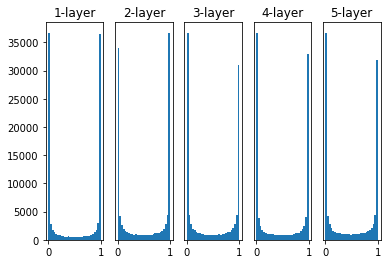

In [6]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


각 층의 활성화값들이 0과 1에 치우쳐 분포함 
> 시그모이드 함수의 출력이 0이나 1에 가까워지면 그 미분은 0에 다가감 
[sigmoid function](https://github.com/DoranLyong/Start_deepLearning_from_floor-/blob/master/Ch3_NeuralNet/L2_Sigmoid_function%20.ipynb)

### 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다 사라짐 
> ★ 이것이 <b>기울기 소실</b><sup>gradient vanishing</sup> 이라 알려진 문제점 

※ 여기서 말하고 싶은 것은: <br/>
* 활성화 값이 0과 1에 치우쳐서 순전파되면 역전파 때 기울기가 0 이되서 가중치를 갱신할 수 없음 

    $\frac{\partial L}{\partial \mathbf{W}}$ = 0  $\;$  ⇒ $\;$    $\mathbf{W}$ ← $\mathbf{W}$ + 0   

#### 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있음 

***

## 가중치의 표준편차를 수정해서 실험
이번에는 가중치의 표준편차를 0.01로 바꿔서 같은 실험을 반복함 

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 
    
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data 

In [8]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！ 
    # 초기값은 가우스 분포에 따라 무작위로 선택 

    w = np.random.randn(node_num, node_num) * 0.01                      # 표준편차를 0.01로 한 정규분포 
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

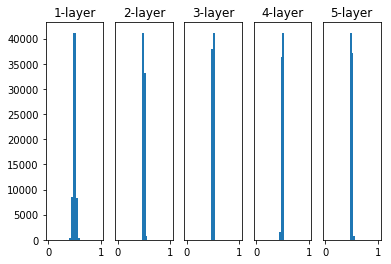

In [9]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


이번에는 활성화 값의 발생 빈도가 0.5 부근에 집중됨 <br/>

앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실 문제는 일어나지 않음 <br/>
> 하지만, <span style="color:blue">활성화값들이 치우쳤다는 것</span>은 범용성과 <b>표현력 관점</b>에서 큰 문제가 있음 

즉, 다양한 값을 넣어도 비슷한 답변만 듣게 되는 경우임.
> 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어짐 <br/>

#### 뉴런 100개가 거의 같은 값을 출력하면 뉴런 1개짜리와 다를 게 없잖아 

***

## 그래서 활성화값들이 치우치면? 
<b>표현력을 제한</b>한다는 관점에서 문제가 있음 

<b><span style="color:red">WARNING</span></b>:  <br/>

각 층(1층, 2층 ...n층)의 활성화값은 적당히 고루 분포되어야 한다. 
> 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄짐 